Талавер Олег ПІ-60[2]
Репозиторій: https://gitlab.com/bachelors2022/pi-60/talaver-oleg/other/ai.git

# СТВОРЕННЯ РЕКОМЕНДАЦІЙНИХ СИСТЕМ

## Створення навчального конвеєра (конвеєра машинного навчання)

Необхідно створити конвеєр, призначений для вибору найбільш важливих ознак з вхідних даних і їх подальшої класифікації з використанням класифікатора на основі гранично випадкового лісу.

In [1]:
from sklearn.datasets import _samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# Генерування даних
X, y = _samples_generator.make_classification(n_samples=150, n_features=25, n_classes=3, n_informative=6,
                                              n_redundant=0, random_state=7)

# Вибір k найважливіших ознак
k_best_selector = SelectKBest(f_regression, k=9)

# Ініціалізація класифікатора на основі гранично випадкового лісу
classifier = ExtraTreesClassifier(n_estimators=60, max_depth=4)

# Створення конвеєра
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])

# Встановлення параметрів
processor_pipeline.set_params(selector__k=7, erf__n_estimators=30)

# Навчання конвеєра
processor_pipeline.fit(X, y)

# Прогнозування результатів для вхідних даних
output = processor_pipeline.predict(X)
print('Predicted output:\n', output)

# Виведення оцінки
print('Score: ', processor_pipeline.score(X, y))

# Виведення ознак, відібраних селектором конвеєра
status = processor_pipeline.named_steps['selector'].get_support()

# Вилучення та виведення індексів обраних ознак
selected = [i for i, x in enumerate(status) if x]
print('Indices of selected features:', ','.join([str(x) for x in selected]))

Predicted output:
 [1 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 0 0 0 2 2 1 2 2 0 0 1 1 0 2 1 0 2 2 1
 1 2 2 2 0 1 2 2 1 2 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 0 1 0 2
 0 0 1 1 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 1 2 2 0 0 1 1 1 1 2 2 0 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 1 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 2 2 2 0 1 2 0
 2 2]
Score:  0.86
Indices of selected features: 4,7,8,12,14,17,22


- Predicted output містить прогнозовані класи
- Score - оцінка точності отриманого прогнозу
- Indices of selected features містить 9 обраних найбільш важливих ознак

## Пошук найближчих сусідів

Здійсніть пошук найближчих сусідів заданої точки даних.

K Nearest Neighbors:
1--> [5.1 2.2]
2--> [3.8 3.7]
3--> [3.4 1.9]
4--> [2.9 2.5]
5--> [5.7 3.5]


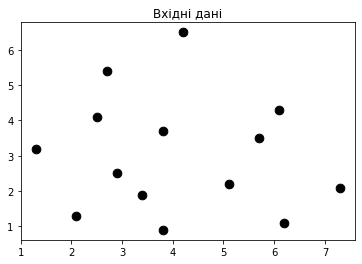

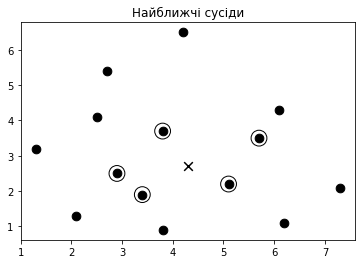

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Вхідні дані
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], [7.3, 2.1], [4.2, 6.5],
              [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])
k = 5

# Тестова точка даних
test_datapoint = [4.3, 2.7]

# Тестова точка даних
plt.figure()
plt.title('Вхідні дані')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='black')

# Побудова моделі на основі методу k найближчих сусідів
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = knn_model.kneighbors([test_datapoint])

# Виведемо 'k' найближчих сусідів
print('K Nearest Neighbors:')
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + '-->', X[index])

# Візуалізація найближчих сусідів разом із тестовою точкою даних
plt.figure()
plt.title('Найближчі сусіди')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1], marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', s=75, color='k')
plt.show()

На першому графіку зображено точки, що використовуються для тренування моделі, на другому, хрестиком позначено тестову точку, а також обведені найближчі точки до тестової
K Nearest Neighbors - список з точок, відсортованих за відстанню до тестової

## Створити класифікатор методом k найближчих сусідів

Використовуючи для аналізу дані, які містяться у файлі data.txt. Створіть класифікатор методом k найближчих сусідів.

Predicted output: 1


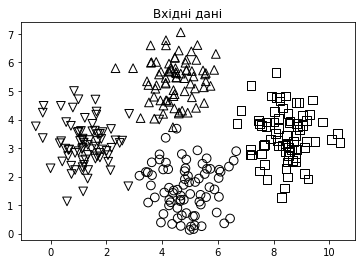

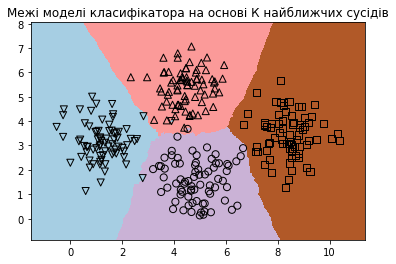

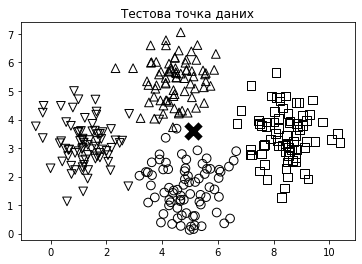

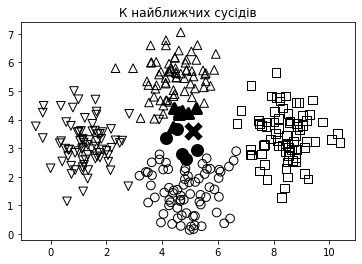

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

# Завантаження вхідних даних
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(np.int32)

# Відображення вхідних даних на графіку
plt.figure()
plt.title('Вхідні дані')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, edgecolors='black', facecolors='none')

# Кількість найближчих сусідів
num_neighbors = 12

step_size = 0.01

# Створення класифікатора на основі методу k найближчих сусідів
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

# Навчання моделі на основі методу k найближчих сусідів
classifier.fit(X, y)

# Створення сітки для відображення меж на графіку
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Виконання класифікатора на всіх точках сітки
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Візуалізація передбачуваного результату
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Накладання навчальних точок на карту
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('Межі моделі класифікатора на основі К найближчих сусідів')

# Тестування вхідної точки даних
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Тестова точка даних')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, edgecolors='black', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', linewidths=6, s=200, facecolors='black')

# Вилучення K найближчих сусідів
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int32)[0]

# Відображення K найближчих сусідів на графіку
plt.figure()
plt.title('К найближчих сусідів')
for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], linewidths=3, s=100, facecolors='black')
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', linewidths=6, s=200, facecolors='black')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, edgecolors='black', facecolors='none')

print('Predicted output:', classifier.predict([test_datapoint])[0])
plt.show()

На першому графіку зображено тренувальні дані. На другому зображені межі класі. На третьому зображено тренувальні дані разом з тестовою точкою. На четвертому Зображено найближчі до тестової тренувальні точки, можна припустити, що тестова точка належить до класу `^`

## Обчислення оцінок подібності

In [5]:
import json
import numpy as np

# Обчислення оцінки евклідової відстані між користувачами user1 та user2
def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')
    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Фільми, оцінені обома користувачами, user1 та user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    # За відсутності фільмів, оцінених обома користувачами, оцінка приймається рівною 0
    if len(common_movies) == 0:
        return 0

    # Квадрат різниці між рейтинговими оцінками
    squared_diff = []

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))

    return 1 / (1 + np.sqrt(np.sum(squared_diff)))


#  Обчислення оцінки подібності за Пірсоном
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')
    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Фільми, оцінені обома користувачами, user1 та user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies)

    # За відсутності фільмів, оцінених обома користувачами, оцінка приймається рівною 0
    if num_ratings == 0:
        return 0

    # Обчислення суми рейтингових оцінок усіх фільмів, оцінених обома користувачами
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Обчислення суми квадратів рейтингових оцінок всіх фільмів, оцінених обома користувачами
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Обчислення суми творів рейтингових оцінок всіх фільмів, оцінених обома користувачами
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Обчислення коефіцієнта кореляції Пірсона
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings

    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)


In [12]:
user1 = 'David Smith'
users2 = ['Bill Duffy', 'Brenda Peterson', 'Samuel Miller', 'Julie Hammel', 'Clarissa Jackson', 'Adam Cohen', 'Chris Duncan']

ratings_file = 'ratings.json'
with open(ratings_file, 'r') as f:
    data = json.loads(f.read())
for user2 in users2:
        print(f'Euclidean score  ({user1}, {user2}): {euclidean_score(data, user1, user2)}')
        print(f'Pearson score ({user1}, {user2}): {pearson_score(data, user1, user2)}')

Euclidean score  (David Smith, Bill Duffy): 0.585786437626905
Pearson score (David Smith, Bill Duffy): 0.9909924304103233
Euclidean score  (David Smith, Brenda Peterson): 0.1424339656566283
Pearson score (David Smith, Brenda Peterson): -0.7236759610155113
Euclidean score  (David Smith, Samuel Miller): 0.30383243470068705
Pearson score (David Smith, Samuel Miller): 0.7587869106393281
Euclidean score  (David Smith, Julie Hammel): 0.2857142857142857
Pearson score (David Smith, Julie Hammel): 0
Euclidean score  (David Smith, Clarissa Jackson): 0.28989794855663564
Pearson score (David Smith, Clarissa Jackson): 0.6944217062199275
Euclidean score  (David Smith, Adam Cohen): 0.38742588672279304
Pearson score (David Smith, Adam Cohen): 0.9081082718950217
Euclidean score  (David Smith, Chris Duncan): 0.38742588672279304
Pearson score (David Smith, Chris Duncan): 1.0


Отже, в більшості результати співпали, проте є певні відмінності

## Пошук користувачів зі схожими уподобаннями методом колаборативної фільтрації.

In [14]:
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('Cannot find ' + user + ' in the dataset')

    # Обчислення оцінки подібності за Пірсоном між вказаним користувачем та всіма іншими користувачами в наборі даних
    scores = np.array([[x, pearson_score(dataset, user, x)] for x in dataset if x != user])

    # Сортування оцінок за спаданням
    scores_sorted = np.argsort(scores[:, 1])[::-1]

    # Вилучення оцінок перших 'num_users' користувачів
    top_users = scores_sorted[:num_users]
    return scores[top_users]

In [15]:
users = ['Bill Duff', 'Clarissa Jackson']

ratings_file = 'ratings.json'
with open(ratings_file, 'r') as f:
    data = json.loads(f.read())

for user in users:
    print('User similar to ' + user + ':\n')
    similar_users = find_similar_users(data, user, 3)
    print('User\t\t\tSimilarity score')
    print('-' * 41)
    for item in similar_users:
        print(item[0], '\t\t', round(float(item[1]), 2))

User similar to Chris Duncan:

User			Similarity score
-----------------------------------------
Clarissa Jackson 		 1.0
Samuel Miller 		 1.0
David Smith 		 1.0
User similar to Julie Hammel:

User			Similarity score
-----------------------------------------
Brenda Peterson 		 1.0
Chris Duncan 		 0.0
David Smith 		 0.0
User similar to Chris Duncan:

User			Similarity score
-----------------------------------------
Clarissa Jackson 		 1.0
Samuel Miller 		 1.0
David Smith 		 1.0


Отже, можемо зробити висновок, що Bill Duffy має найбільш схожі вподобання з David Smith (що співпадає з результатами при обчисленні оцінок подібності, табл. 1), а Clarissa Jackson – з Chris Duncan.

## Створення рекомендаційної системи фільмів

Створіть рекомендаційну систему на основі даних, наданих у файлі ratings.json. У цьому файлі міститься інформація про користувачів та оцінки, дані ними різним фільмам. Щоб рекомендувати фільми конкретному користувачу, ми повинні знайти аналогічних користувачів у наборі даних та використовувати інформацію про їх переваги для формування відповідної рекомендації.

In [17]:
# Отримати рекомендації щодо фільмів для вказаного користувача
def get_recommendations(dataset, input_user):
    if input_user not in dataset:
        raise TypeError('Cannot find ' + input_user + ' in the dataset')

    overall_scores = {}
    similarity_scores = {}

    for user in [x for x in dataset if x != input_user]:
        similarity_score = pearson_score(dataset, input_user, user)

        if similarity_score <= 0:
            continue

        filtered_list = [x for x in dataset[user] if x not in dataset[input_user] or dataset[input_user][x] == 0]
        for item in filtered_list:
            overall_scores.update({item: dataset[user][item] * similarity_score})
            similarity_scores.update({item: similarity_score})

        if len(overall_scores) == 0:
            return ['No recommendations possible']

        # Генерація рейтингів фільмів за допомогою їх нормалізації
        movie_scores = np.array([[score / similarity_scores[item], item] for item, score in overall_scores.items()])

        # Сортування за спаданням
        movie_scores = movie_scores[np.argsort(movie_scores[:, 0])[::-1]]

        # Вилучення рекомендацій фільмів
        movie_recommendations = [movie for _, movie in movie_scores]
        return movie_recommendations

In [19]:
users = ['Chris Duncan', 'Julie Hammel', 'Chris Duncan']

ratings_file = 'ratings.json'
with open(ratings_file, 'r') as f:
    data = json.loads(f.read())

for user in users:
    print('Movie recommendations for ' + user + ':')
    movies = get_recommendations(data, user)
    for i, movie in enumerate(movies):
        print(str(i + 1) + '. ' + movie)

Movie recommendations for Chris Duncan:
1. Goodfellas
2. Scarface
3. Vertigo
Movie recommendations for Julie Hammel:
1. The Apartment
2. Vertigo
3. Raging Bull
Movie recommendations for Chris Duncan:
1. Goodfellas
2. Scarface
3. Vertigo


Бачимо, що у двох користувачів співпав один фільм у списку. Спробуємо переві-рити спорідненість їх вподобань. При цьому перевірки показують, що у них немає спільних характеристик.